code 1

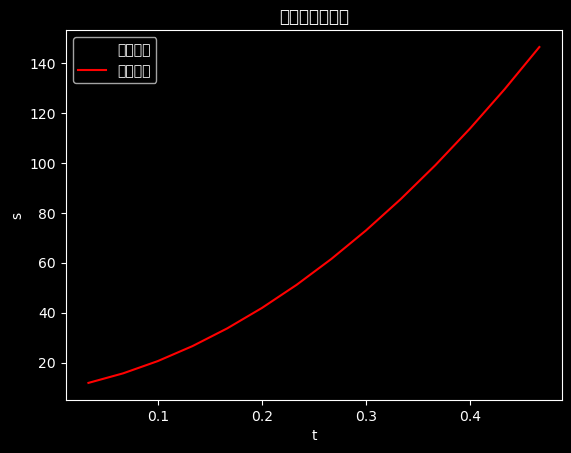

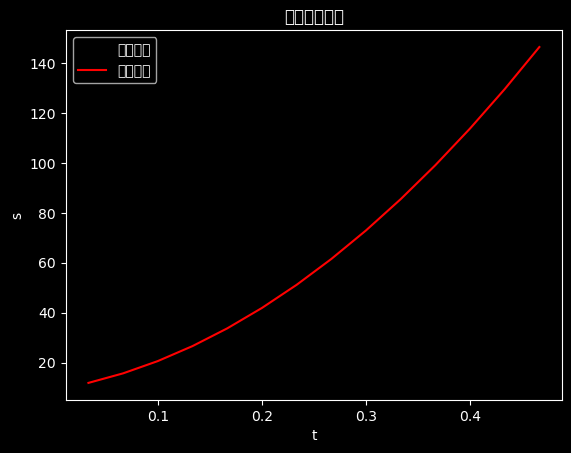

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial  # 用于二次多项式拟合

# 1. 二次多项式回归
t = np.arange(1/30, 14/30 + 1/30, 1/30)  # 自变量 t
s = np.array([11.86, 15.67, 20.6, 26.69, 33.71, 41.93, 51.13, 61.49, 72.9, 85.44, 99.08, 113.77, 129.54, 146.48])  # 因变量 s

# 进行二次多项式拟合
p = np.polyfit(t, s, 2)  # 返回多项式的系数
p = Polynomial(p[::-1])  # 将系数转换为 Polynomial 对象，注意系数顺序需要反转
# Polynomial(p[::-1]) 表示将系数 p 转换为多项式，其中 p[::-1] 表示将 p 的元素反转

# 预测及作图
Y = p(t)  # 计算拟合曲线的预测值
plt.plot(t, s, 'k+', label='原始数据')  # 绘制原始数据点
plt.plot(t, Y, 'r', label='拟合曲线')  # 绘制拟合曲线
plt.xlabel('t')  # 设置 x 轴标签
plt.ylabel('s')  # 设置 y 轴标签
plt.title('二次多项式回归')  # 设置图表标题
plt.legend()  # 设置图例
plt.show()

# 2. 化为多元线性回归
# 构建多元线性回归的自变量矩阵
T = np.vstack([np.ones_like(t), t, t**2]).T  # [ones, t, t^2]
b, _, _, _ = np.linalg.lstsq(T, s, rcond=None)  # 进行多元线性回归分析，返回系数
#_,表示忽略的变量，因为这里没有忽略任何变量

# 预测及作图
Y_linear = T @ b  # 计算拟合曲线的预测值     @ 表示矩阵乘法
plt.plot(t, s, 'k+', label='原始数据')  # 绘制原始数据点
plt.plot(t, Y_linear, 'r', label='拟合曲线')  # 绘制拟合曲线
plt.xlabel('t')  # 设置 x 轴标签
plt.ylabel('s')  # 设置 y 轴标签
plt.title('多元线性回归')  # 设置图表标题
plt.legend()  # 设置图例
plt.show()

code 2

多元二项式回归结果：
回归系数 (beta): Intercept          110.531274
x1                   0.146431
x2                 -26.570937
np.power(x1, 2)     -0.000076
np.power(x2, 2)      1.847493
dtype: float64
剩余标准差 (rmse): 4.536196580798908
回归模型：y = 110.5313 + 0.1464x1 + -26.5709x2 + -0.0001x1^2 + 1.8475x2^2

多元线性回归结果：
回归系数 (b): [ 1.10531274e+02  1.46430657e-01 -2.65709365e+01 -7.55669326e-05
  1.84749312e+00]
统计信息 (stats):
  R-squared: 0.9701781457686204
  F-statistic: 40.66556937746369
  p-value: 0.0005260822543900507


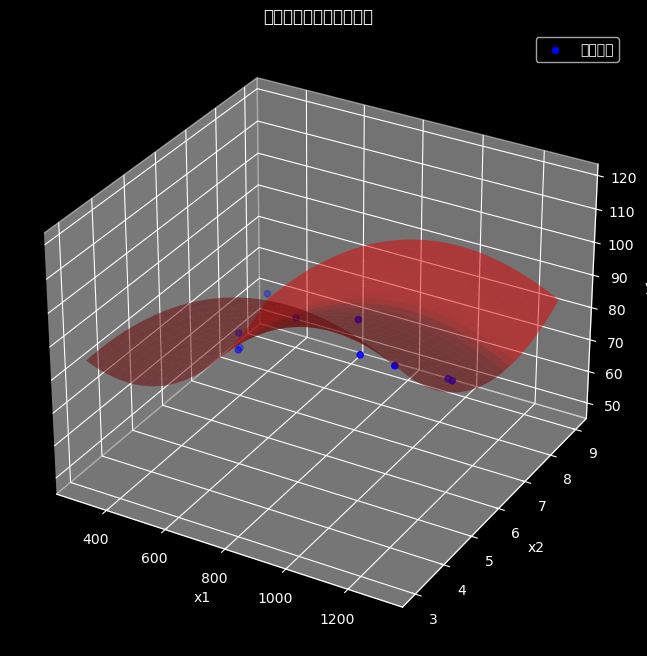

In [10]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf    # 导入 statsmodels 的公式 API 用于构建模型
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 数据
x1 = np.array([1000, 600, 1200, 500, 300, 400, 1300, 1100, 1300, 300])
x2 = np.array([5, 7, 6, 6, 8, 7, 5, 4, 3, 9])
y = np.array([100, 75, 80, 70, 50, 65, 90, 100, 110, 60])

# 1. 直接用多元二项式回归
# 使用 statsmodels 进行多元二项式回归
data = {'x1': x1, 'x2': x2, 'y': y}
model = smf.ols('y ~ x1 + x2 + np.power(x1, 2) + np.power(x2, 2)', data=data).fit()
# smf.ols()表示构建线性模型，'y ~ x1 + x2 + np.power(x1, 2) + np.power(x2, 2)'表示回归方程，data表示数据集
# ~表示回归，+表示多元回归，np.power(x1, 2)表示x1的平方，np.power(x2, 2)表示x2的平方
print("多元二项式回归结果：")
print("回归系数 (beta):", model.params)
print("剩余标准差 (rmse):", np.sqrt(model.mse_resid))
print("回归模型：y = {:.4f} + {:.4f}x1 + {:.4f}x2 + {:.4f}x1^2 + {:.4f}x2^2".format(*model.params))

# 2. 化为多元线性回归
# 构建自变量矩阵
X = np.vstack([np.ones(len(x1)), x1, x2, x1**2, x2**2]).T
X = sm.add_constant(X, has_constant='skip')  # 添加常数项
model_linear = sm.OLS(y, X).fit()
print("\n多元线性回归结果：")
print("回归系数 (b):", model_linear.params)
print("统计信息 (stats):")
print("  R-squared:", model_linear.rsquared)
print("  F-statistic:", model_linear.fvalue)
print("  p-value:", model_linear.f_pvalue)

# 绘制模型预览图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制原始数据点
ax.scatter(x1, x2, y, color='blue', label='原始数据')

# 生成网格点用于绘制拟合曲面
x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 30), np.linspace(min(x2), max(x2), 30))
y_grid = model.params['Intercept'] + model.params['x1'] * x1_grid + model.params['x2'] * x2_grid + \
         model.params['np.power(x1, 2)'] * x1_grid**2 + model.params['np.power(x2, 2)'] * x2_grid**2

# 绘制拟合曲面
ax.plot_surface(x1_grid, x2_grid, y_grid, color='r', alpha=0.5)

# 设置标签和标题
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('多元二项式回归模型预览')
ax.legend()

plt.show()

code 3

回归系数 (beta): [11.60366828 -1.06412998]


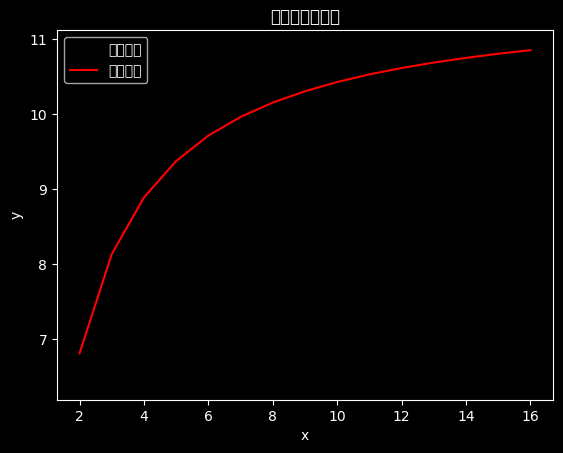

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. 输入数据
x = np.arange(2, 17)  # x = 2:16
y = np.array([6.42, 8.20, 9.58, 9.5, 9.7, 10, 9.93, 9.99, 10.49, 10.59, 10.60, 10.80, 10.60, 10.90, 10.76])

# 定义曲线函数
def volum(x, beta0, beta1):
    return beta0 * np.exp(beta1 / x)

# 2. 求回归系数
beta0 = [8, 2]  # 初始值
beta, cov_beta = curve_fit(volum, x, y, p0=beta0)

print("回归系数 (beta):", beta)

# 3. 预测及作图
# 预测因变量的值
YY = volum(x, *beta)  # 使用解包操作符 * 将 beta 中的值传递给函数

# 绘制原始数据点和拟合曲线
plt.plot(x, y, 'k+', label='原始数据')  # 绘制原始数据点
plt.plot(x, YY, 'r', label='拟合曲线')  # 绘制拟合曲线
plt.xlabel('x')
plt.ylabel('y')
plt.title('非线性回归拟合')
plt.legend()
plt.show()